In [237]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from tfld import tfld

import tensorflow_probability as tfp
from scipy.stats import multivariate_normal, norm


[-0.9617876  0.2737967]
[ 0.9617876 -0.2737967]
[-0.68861634 -0.72512585]
[0.68861634 0.72512585]
[1 0]
[-1  0]
[ 0.99599688 -0.08938798]


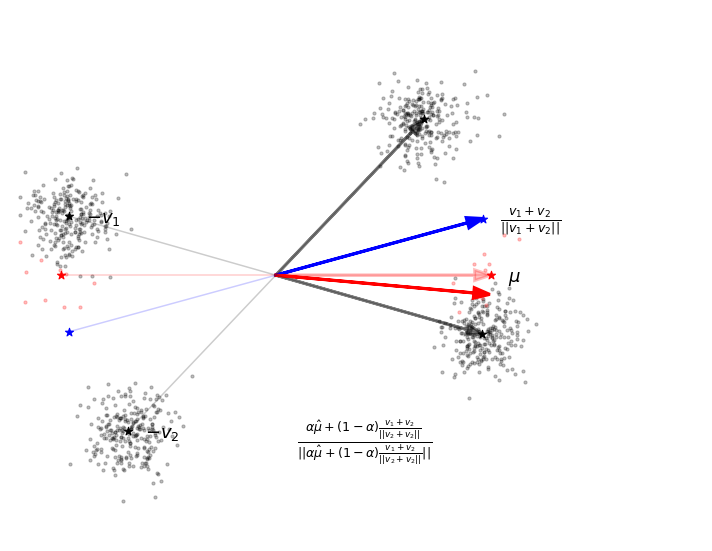

In [280]:
np.random.seed(5)

fig, ax = plt.subplots(1,1, figsize=(10,10))

mu = [1,0]
kappa= 5

vmf = tfp.distributions.VonMisesFisher(mu, kappa)

# dir_vectors = vmf.sample(2).numpy()

vectors = [*dir_vectors, np.array(mu)]
colors=['k', 'k', 'r']
np.random.seed(7)
for ii,vec in enumerate(vectors):
    if ii == 2:
        X = []
        for i in [1,-1]:
            print(i*vec)
            samples = np.random.multivariate_normal(mean=i*vec, cov=0.01*np.eye(2), size=10)
            X.append(samples)
            ax.scatter(samples[:,0], samples[:,1], color=colors[ii], alpha=0.25, s=10)
        X=np.concatenate(X)
        y = np.concatenate([i*np.ones(10) for i in range(2)])
        fld = tfld.FLD().fit(X,y)
        proj_vector = fld.projection_
        proj_vector /= np.linalg.norm(proj_vector)
    else:
        for i in [-1, 1]:
            print(i*vec)
            samples = np.random.multivariate_normal(mean=i*vec, cov=0.01*np.eye(2), size=250)
            ax.scatter(samples[:,0], samples[:,1], color=colors[ii], alpha=0.25, s=10)

s=75

ax.scatter(*np.array(mu), c='r', s=s, marker='*')
ax.scatter(*-np.array(mu), c='r', s=s, marker='*')
ax.plot([-mu[0], mu[0]], [-mu[1], mu[1]], color='r', alpha=0.2)

for i,dir_ in enumerate(dir_vectors):
    ax.scatter(*dir_, color='k', s=s, marker='*')
    ax.scatter(*-dir_, color='k', s=s, marker='*')
    
    ax.plot([-dir_[0], dir_[0]], [-dir_[1], dir_[1]], color='k', alpha=0.2)
    ax.arrow(0,0,dir_[0], dir_[1], head_width=0.05, length_includes_head=True, color='k', lw=3, alpha=0.5)
    

    
    

    
sum_ = np.sum(dir_vectors, axis=0)
sum_ /= np.linalg.norm(sum_)
ax.plot([-sum_[0], sum_[0]], [-sum_[1], sum_[1]], color='b', alpha=0.2)


ax.scatter(*-sum_, c='b', s=s, marker='*')
ax.scatter(*sum_, c='b', s=s, marker='*')

ax.set_xlim(-1.25, 2)
ax.set_ylim(-1.25,1.25)
ax.set_aspect('equal')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.text(mu[0]+0.08, mu[1]-0.03, s='$\mu$', fontsize=18)
ax.text(-dir_vectors[0][0]+0.08, -dir_vectors[0][1]-0.03, s='$-v_{1}$', fontsize=18)
ax.text(-dir_vectors[1][0]+0.08, -dir_vectors[1][1]-0.03, s='$-v_{2}$', fontsize=18)

ax.arrow(0,0,mu[0], mu[1], head_width=0.05, length_includes_head=True, color='r', lw=3, alpha=0.25)
ax.arrow(0,0,sum_[0], sum_[1], head_width=0.05, length_includes_head=True, color='b', lw=3)

ax.arrow(0,0,proj_vector[0], proj_vector[1], color='r', head_width=0.05, length_includes_head=True, lw=3)


ax.text(sum_[0]+0.08, sum_[1]-0.03, s=r'$\frac{v_{1} + v_{2}}{ ||v_{1} + v_{2}||}$', fontsize=18)


# ax.text(mu[0]-0.2, mu[1]- 0.22, s='{', fontsize=40, rotation=-15)

plt.tight_layout()

ax.text(0.1, -0.8, s=r'$\frac{\alpha \hat{\mu} + (1-\alpha)\frac{v_{1} + v_{2}}{||v_{2} + v_{2}||}}{||\alpha\hat{\mu} + (1-\alpha) \frac{v_{1} + v_{2}}{||v_{2} + v_{2}||}||}$', fontsize=18)
print(proj_vector)
plt.savefig('illustrative_figure.png',dpi=500)

In [243]:
proj_vector

array([-81.88942161,  16.36171401])